In [57]:
from mpes import fprocessing as fp, visualization as vis
import matplotlib.pyplot as plt
import numpy as np
import glob as g

### 2.1 Loading data

In [17]:
fpath = r'../data/data_114_parts/data_114_split_1.h5'

In [18]:
hp = fp.hdf5Processor(fpath)

### 2.2 Binning data

In [25]:
axes = ['X', 'Y', 't']
bins = [100, 100, 200]
ranges = [(300, 1800), (200, 1800), (68000, 90000)]

#### 2.2.1 Local binning

In [43]:
resdict = hp.localBinning_numba(axes=axes, nbins=bins, ranges=ranges)

In [44]:
resdict.keys()

dict_keys(['binned', 'X', 'Y', 't'])

In [45]:
resdict['X']

array([ 307.5,  322.5,  337.5,  352.5,  367.5,  382.5,  397.5,  412.5,
        427.5,  442.5,  457.5,  472.5,  487.5,  502.5,  517.5,  532.5,
        547.5,  562.5,  577.5,  592.5,  607.5,  622.5,  637.5,  652.5,
        667.5,  682.5,  697.5,  712.5,  727.5,  742.5,  757.5,  772.5,
        787.5,  802.5,  817.5,  832.5,  847.5,  862.5,  877.5,  892.5,
        907.5,  922.5,  937.5,  952.5,  967.5,  982.5,  997.5, 1012.5,
       1027.5, 1042.5, 1057.5, 1072.5, 1087.5, 1102.5, 1117.5, 1132.5,
       1147.5, 1162.5, 1177.5, 1192.5, 1207.5, 1222.5, 1237.5, 1252.5,
       1267.5, 1282.5, 1297.5, 1312.5, 1327.5, 1342.5, 1357.5, 1372.5,
       1387.5, 1402.5, 1417.5, 1432.5, 1447.5, 1462.5, 1477.5, 1492.5,
       1507.5, 1522.5, 1537.5, 1552.5, 1567.5, 1582.5, 1597.5, 1612.5,
       1627.5, 1642.5, 1657.5, 1672.5, 1687.5, 1702.5, 1717.5, 1732.5,
       1747.5, 1762.5, 1777.5, 1792.5])

#### 2.2.2 Parallel binning using split HDF5 files
Retrieve split files

In [21]:
splits_folder = r'../data/data_114_parts'
parp = fp.parallelHDF5Processor(folder=splits_folder)
parp.gather(identifier=r'/data*h5')

In [46]:
parp.viewEventHistogram(fid=0, ncol=2, backend='bokeh')

Rearrange file by the numbering using regular expression pattern matching (optional step)

In [23]:
from time import time

In [26]:
tstart = time()
parp.parallelBinning(axes=axes, nbins=bins, ranges=ranges, scheduler='threads', \
                     binning_kwds={'jittered':True}, ret=False)
tend = time()
print('Binning took about {} s.'.format(int(tend - tstart)))

100%|██████████| 3/3 [01:16<00:00, 25.55s/it]

Binning took about 76 s.


In [27]:
parp.combinedresult

{'binned': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

In [19]:
parp.saveHistogram(form='h5', save_addr='./parbin_result')

#### 2.2.3 Binning of selected events (within a single file)
Example using decay of WSe2 band structure

In [70]:
fpath = r'../data/data_20180605_114.h5'
hp = fp.hdf5Processor(fpath)

In [71]:
axes = ['t']
bins = [200]
ranges = [(68000, 90000)]

In [72]:
hp.localBinning(axes=axes, nbins=bins, ranges=ranges, amin=0, amax=10000, ret=False)

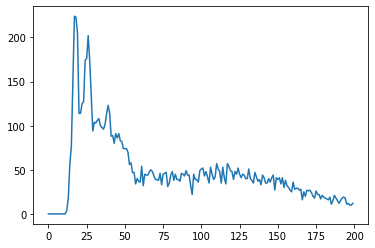

In [73]:
plt.plot(hp.histdict['binned'])

#### 2.2.4 Binning files by the portion (from a collection of files)

In [28]:
splits_folder = r'../data/data_114_parts'
parp = fp.parallelHDF5Processor(folder=splits_folder)
parp.gather(identifier=r'/data*.h5', file_sorting=True)
portion = 10
npart = parp.nfiles // portion

In [30]:
for i in range(0, npart):
    parp.gather(identifier=r'/data*.h5', f_start=i*portion, f_end=(i+1)*portion, f_step=1, file_sorting=True)
    parp.parallelBinning(axes=axes, nbins=bins, ranges=ranges, scheduler='threads', combine=True,
                         binning_kwds={'jittered':True}, ret=False)
    # parp.saveHistogram(...) # For saving results (see example earlier in this notebook)

100%|██████████| 1/1 [00:14<00:00, 14.83s/it]


### 2.3 Plotting the binning results

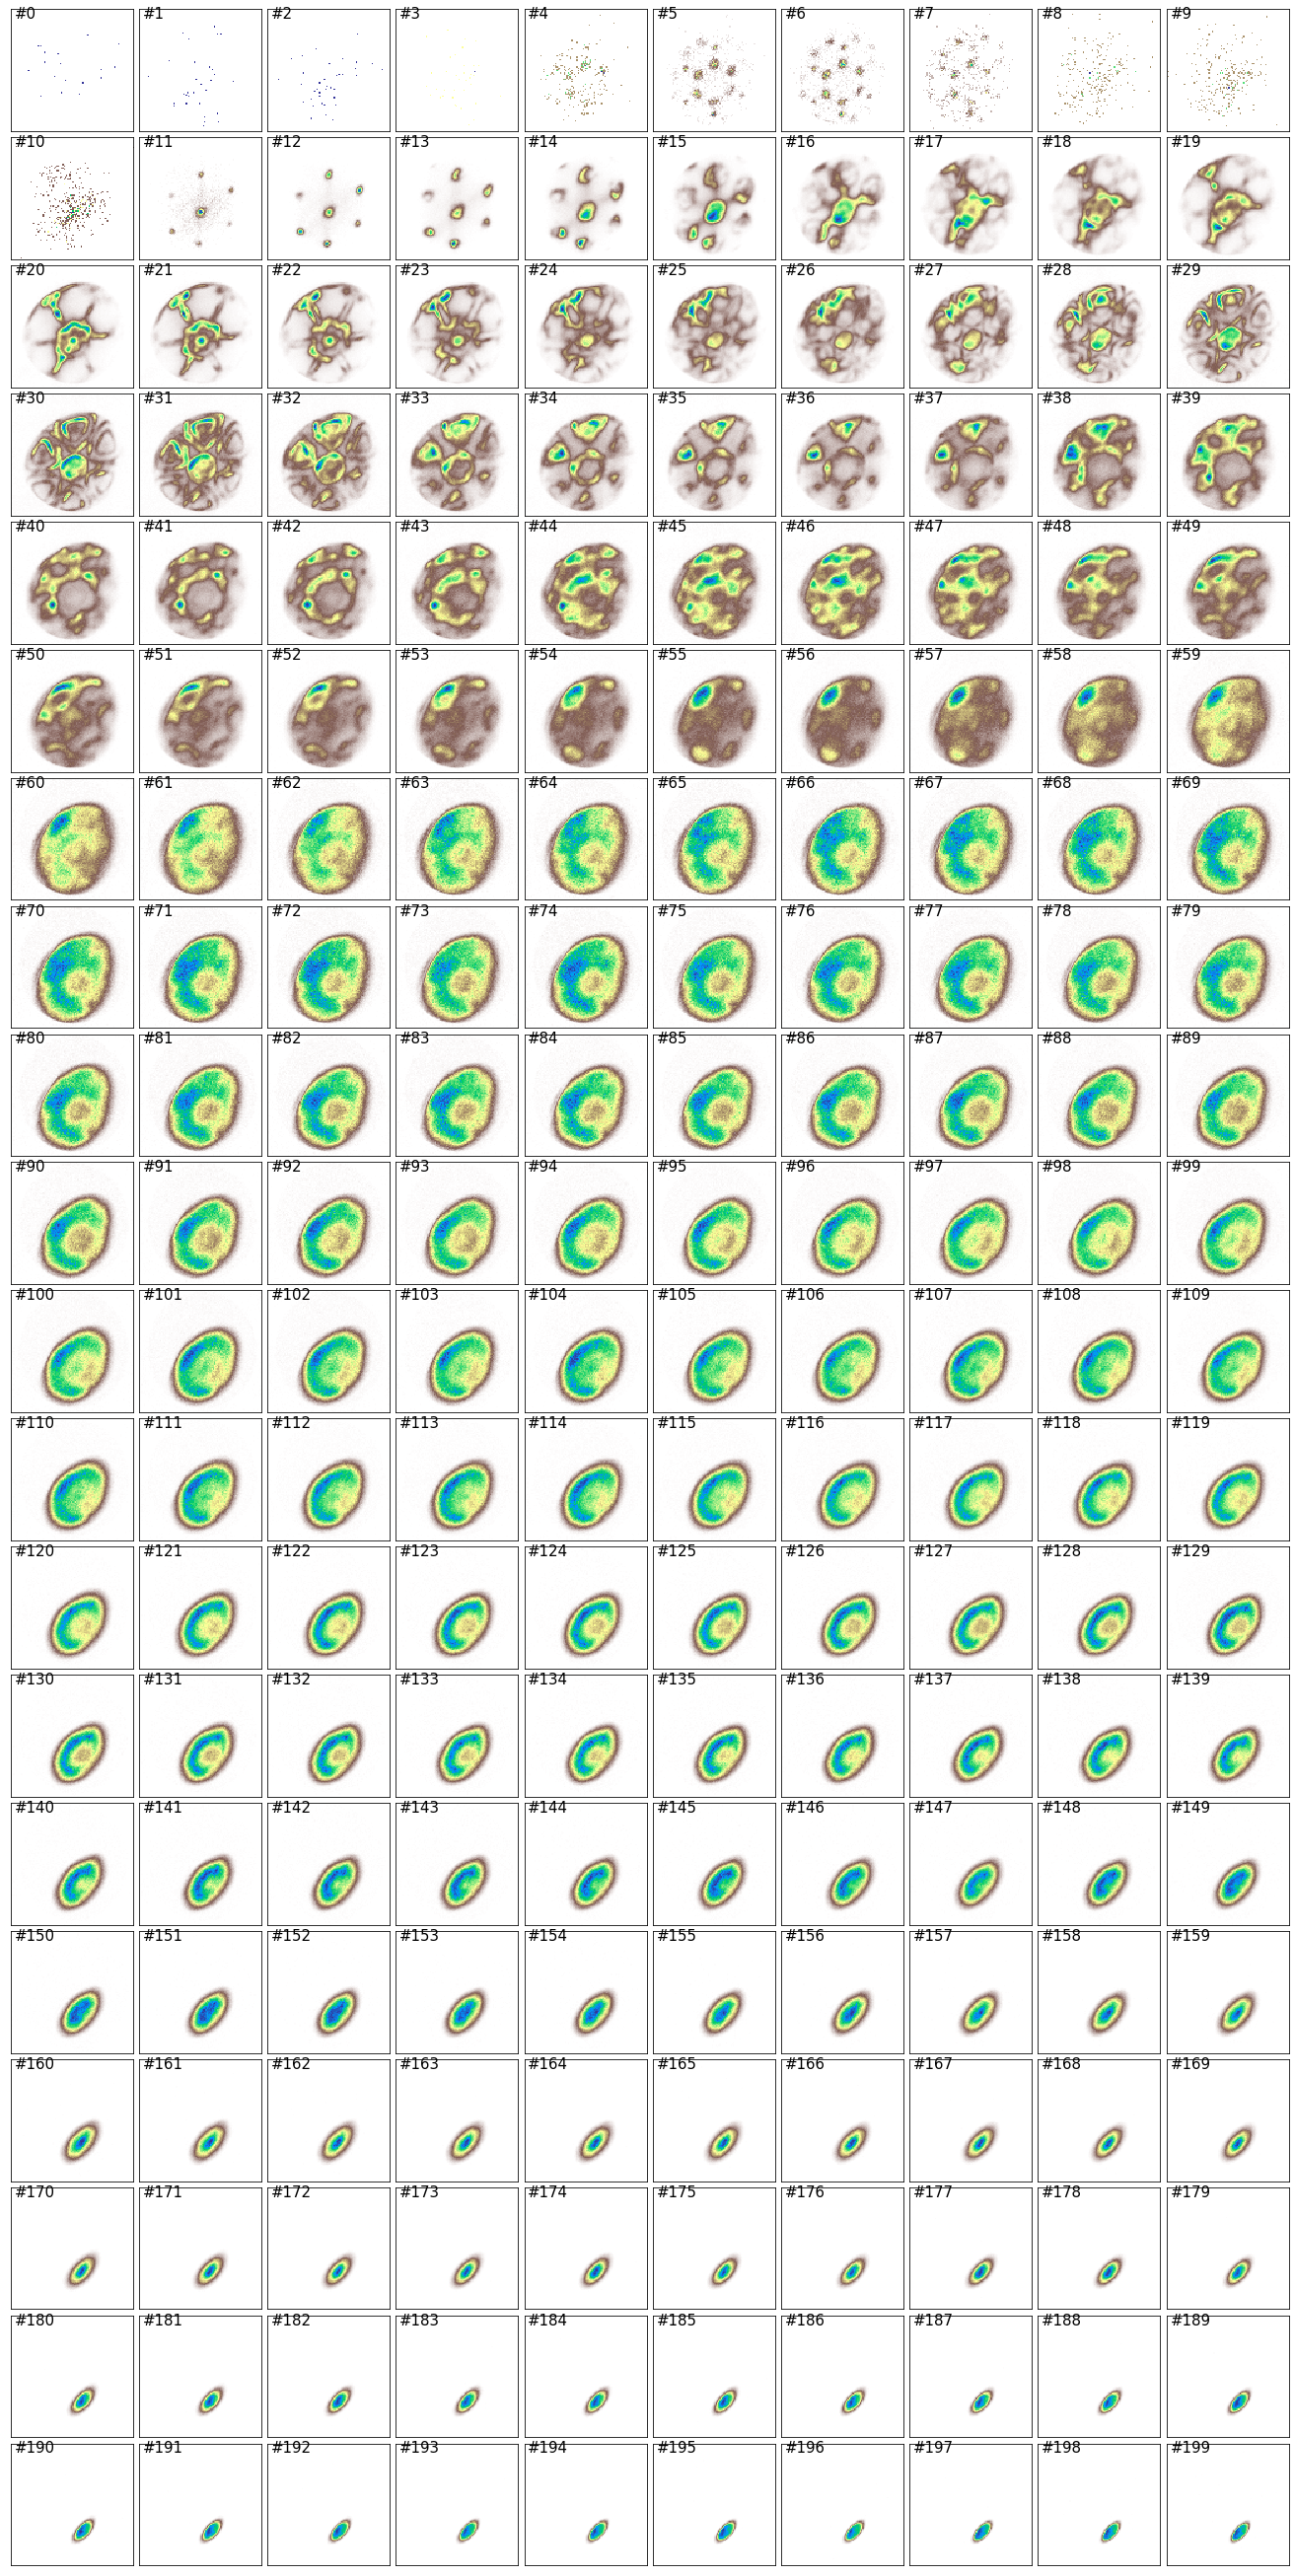

In [33]:
vis.sliceview3d(parp.combinedresult['binned'], axis=2, ncol=10, colormap='terrain_r');

### 2.4 Update the binning results

In [34]:
parp.combinedresult['binned'].shape

(100, 100, 200)

In [35]:
parp.updateHistogram(axes=['X','Y'], sliceranges=[(0, 80), (10, 90)])

In [36]:
parp.combinedresult['binned'].shape

(80, 80, 200)

### 2.5 Saving the binning results
Save the histogram and axes in HDF5 (h5), Matlab (mat), image (only histogram) such as tiff (3D/4D) or png (2D slices of 3D) formats.

In [10]:
hp.saveHistogram(save_addr='../binres_114', form='h5', dtyp='float32')

In [11]:
hp.saveHistogram(save_addr='../binres_114', form='mat', mat_compression=True)

In [12]:
hp.saveHistogram(save_addr='../binres_114', form='tiff', dtyp='float32')

In [ ]:
hp.saveHistogram(save_addr='../binres_114', form='png', cutaxis=2)